
## data_month5
#### IRON | ??? |                                          


In [1]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d =29
time_a = pd.date_range('2017-02-01 00:00:00', periods=5760*(d+1), freq='15S')
# print time_a
time_b = pd.date_range('2017-02-01 00:00:14', periods=5760*(d+1), freq='15S')
# print time_b

clock1 = time_b.strftime("%H:%M:%S")

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

conn1= MySQLdb.connect("localhost","conn","hems")
c1 = conn1.cursor()

####### set databases to empty #########
query_empty = """truncate table data_month5.IRON""" 
c1.execute(query_empty)
print "data_month5.IRON are Empty!!! \n"

query = "SELECT watt FROM collected_info.9_IRON WHERE no >= '%s'   AND no <= '%s'; "% (0,1539)
df = pd.read_sql(query, conn)
# print df.watt[5]


#### Random the turning-on time appliances
def rand_turnon():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(0, 59)
    duration_hour1 = ['10'] * 2 +  ['11'] * 3 + ['12'] * 5 + ['13'] * 50 + ['14'] * 20 + ['15'] * 10 +['16'] * 5 +['17'] * 5    #SET Start between 10-17 o'clock.
    duration_hour = random.choice(duration_hour1)     
    if 0 < duration_sec <= 15:
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
    off_item = (int(duration_hour)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on appliacne on",duration_hour,":",duration_min,":",duration_sec,"equal to",off_item,"items"
    return off_item

 
#### Random the off-duration appliances 
def rand_duration():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(0, 59)
    duration_hour =  random.randint(2, 5)     
    seconds = (duration_hour*3600)+(duration_min*60)+duration_sec
    no_item = seconds/15
    print "consuming the appliance", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item,"items"
    return no_item


a = 0
days = 0
j = 0
i = 0
do_days1 = ['5'] * 33 + ['6'] * 33 + ['0'] * 34 
do_days = random.choice(do_days1)
dict = {'5': 'Friday', '6': 'Saturday', '0': 'Sunday'}
print "| use iron in next week on | ... ",dict[do_days]
off_item = rand_turnon()  
no_item = rand_duration()


while (j <= (5760*d)-1):
    no_days = int(time_b[j].strftime('%w'))  # find 0-6 of no_days

    
    if (no_days == 0 and clock1[j] == u'23:59:59'):    #if no_day is SUNDAY at 23:59:59 check d0_days in week 
        do_days1 = ['5'] * 33 + ['6'] * 33 + ['0'] * 34     #fri-sat-sun
        do_days = random.choice(do_days1) 
        dict = {'5': 'Friday', '6': 'Saturday', '0': 'Sunday'}
        print "\n| use iron in next week on | ... ",dict[do_days]
        off_item = rand_turnon()  
        no_item = rand_duration()


    if (int(do_days) == no_days):
        i= 0  
        c1.execute("INSERT INTO data_month5.IRON (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
        while (off_item+(5760*(days-1))<= j <= (no_item+off_item)+(5760*(days-1))):
            c1.execute("INSERT INTO data_month3.IRON (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
            conn1.commit()
            i += 1 
            j += 1     
            print "|",j,
    else : 
        c1.execute("INSERT INTO data_month5.IRON (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
        
    if (j%5760 == 0):
        print "\nDays :",days ,":",time_b[j].strftime('%a')
        days +=1        
    j += 1
    conn1.commit()
print "DONE!"

 


data_month5.IRON are Empty!!! 

| use iron in next week on | ...  Saturday
time to turn-on appliacne on 13 : 19 : 45 equal to 3198 items
consuming the appliance 5 hours 13 minutes 34 seconds that equal to 18814 seconds or 1254 items

Days : 0 : Wed

Days : 1 : Thu

Days : 2 : Fri

Days : 3 : Sat
| 20479 | 20480 | 20481 | 20482 | 20483 | 20484 | 20485 | 20486 | 20487 | 20488 | 20489 | 20490 | 20491 | 20492 | 20493 | 20494 | 20495 | 20496 | 20497 | 20498 | 20499 | 20500 | 20501 | 20502 | 20503 | 20504 | 20505 | 20506 | 20507 | 20508 | 20509 | 20510 | 20511 | 20512 | 20513 | 20514 | 20515 | 20516 | 20517 | 20518 | 20519 | 20520 | 20521 | 20522 | 20523 | 20524 | 20525 | 20526 | 20527 | 20528 | 20529 | 20530 | 20531 | 20532 | 20533 | 20534 | 20535 | 20536 | 20537 | 20538 | 20539 | 20540 | 20541 | 20542 | 20543 | 20544 | 20545 | 20546 | 20547 | 20548 | 20549 | 20550 | 20551 | 20552 | 20553 | 20554 | 20555 | 20556 | 20557 | 20558 | 20559 | 20560 | 20561 | 20562 | 20563 | 20564 | 20565 | 20566

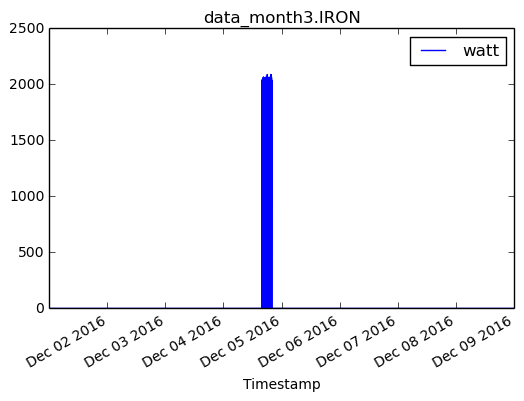

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  


# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT Timestamp,watt FROM data_month3.IRON WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[5760*8])
df = pd.read_sql(query, conn1, index_col=['Timestamp'])
fig, ax = plt.subplots()
ax.set_title('data_month3.IRON')
df.plot(ax=ax )
plt.show()
# df.to_csv('file.csv')
# print len(df)
